In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn import preprocessing
import sklearn.metrics.pairwise as pairwise
from sklearn.manifold import MDS

import re


plt.style.use('ggplot')

In [4]:
df = pd.read_csv("input/wine/wine.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
expr = re.compile('.*[0-9]+\)\s?(\w+).*')

In [10]:
header_names = ['Class']

df_header = open("input/wine/wine.names")

for l in df_header.readlines():
    if len(expr.findall(l.strip())) != 0:
        header_names.append(expr.findall(l.strip()) [0])

df_header.close()

In [11]:
header_names

['Class',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Total',
 'Flavanoids',
 'Nonflavanoid',
 'Proanthocyanins',
 'Color',
 'Hue',
 'OD280',
 'Proline']

In [13]:
df.columns = header_names
df.describe()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [17]:
df_normalised = pd.DataFrame(preprocessing.scale(df[header_names[1:]]))

In [18]:
df_normalised.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
distances = pairwise.euclidean_distances(df_normalised)

c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\eddho\AppData\Local\Temp\ipykernel_20016\1969325208.py:3: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0, color=df['Class'][:], colormap='Reds')


<Axes: xlabel='1', ylabel='0'>

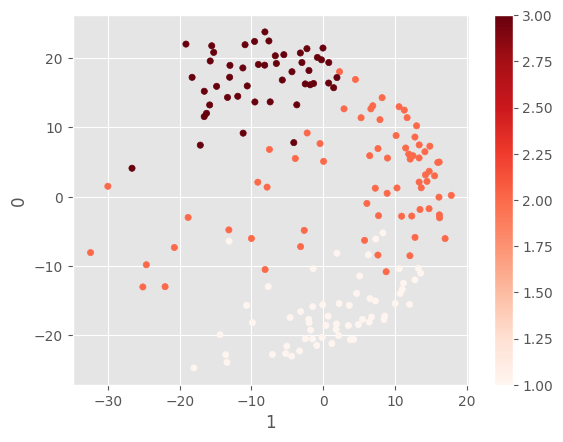

In [27]:
mds_coords = MDS().fit_transform(distances)

pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0, color=df['Class'][:], colormap='Reds')